Neural network approach to Iris dataset

In [1]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library

c:\Users\rushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
#Reading data 
data=pd.read_csv("Iris.csv")
print("Describing the data: ",data.describe())
print("Info of the data:",data.info())

Describing the data:                 Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidt

In [3]:
print("10 first samples of the dataset:",data.head(10))
print("10 last samples of the dataset:",data.tail(10))

10 first samples of the dataset:    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa
10 last samples of the dataset:       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
140  141          

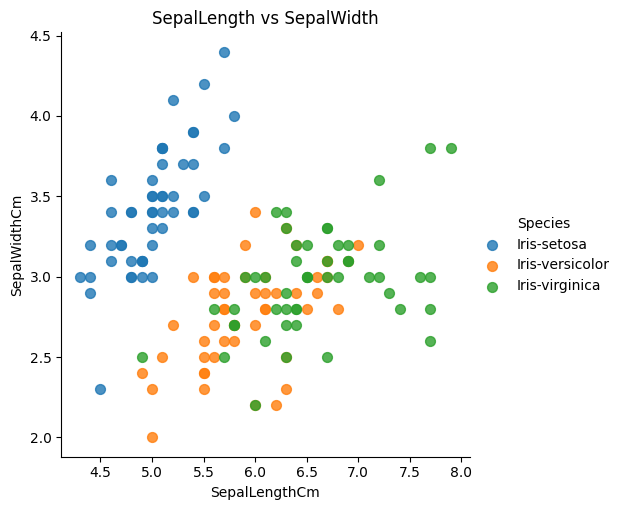

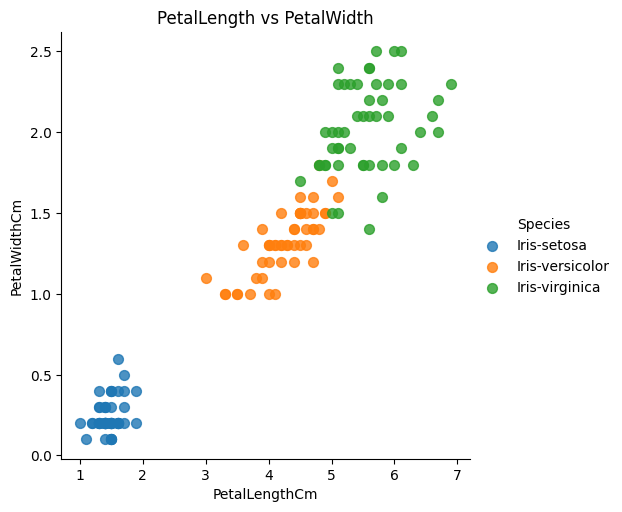

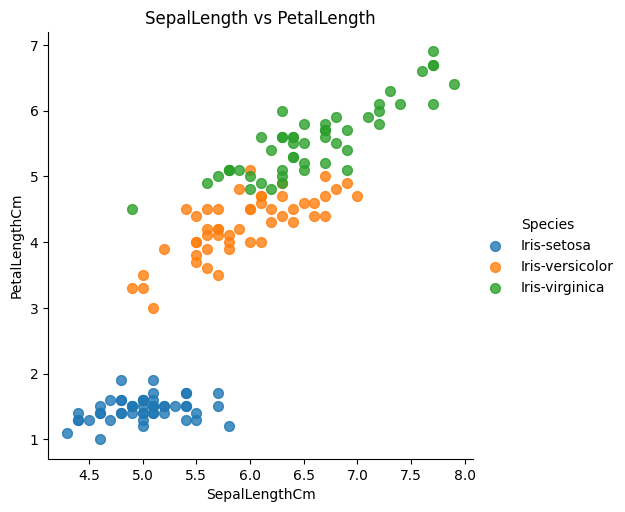

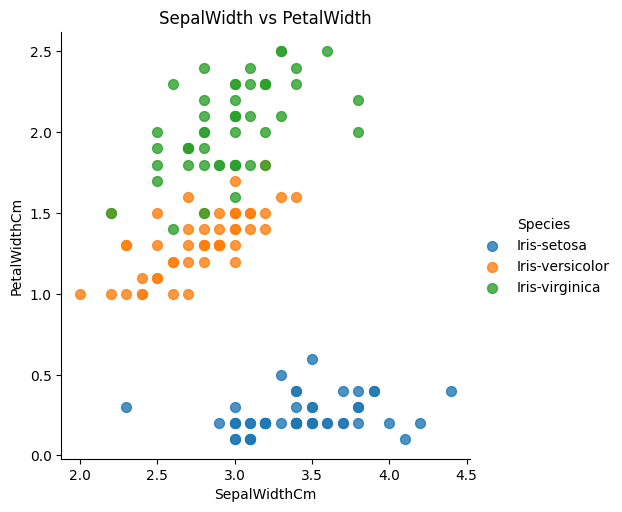

In [5]:
sns.lmplot(
    x='SepalLengthCm',
    y='SepalWidthCm',
    data=data,
    fit_reg=False,
    hue='Species',
    scatter_kws={"marker": "D", "s": 50}
)
plt.title('SepalLength vs SepalWidth')

sns.lmplot(
    x='PetalLengthCm',
    y='PetalWidthCm',
    data=data,
    fit_reg=False,
    hue='Species',
    scatter_kws={"marker": "D", "s": 50}
)
plt.title('PetalLength vs PetalWidth')

sns.lmplot(
    x='SepalLengthCm',
    y='PetalLengthCm',
    data=data,
    fit_reg=False,
    hue='Species',
    scatter_kws={"marker": "D", "s": 50}
)
plt.title('SepalLength vs PetalLength')

sns.lmplot(
    x='SepalWidthCm',
    y='PetalWidthCm',
    data=data,
    fit_reg=False,
    hue='Species',
    scatter_kws={"marker": "D", "s": 50}
)
plt.title('SepalWidth vs PetalWidth')

plt.show()

In [6]:
print(data["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
data.loc[data["Species"]=="Iris-setosa","Species"]=0
data.loc[data["Species"]=="Iris-versicolor","Species"]=1
data.loc[data["Species"]=="Iris-virginica","Species"]=2
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0   1            5.1           3.5            1.4           0.2       0
1   2            4.9           3.0            1.4           0.2       0
2   3            4.7           3.2            1.3           0.2       0
3   4            4.6           3.1            1.5           0.2       0
4   5            5.0           3.6            1.4           0.2       0


In [8]:
data=data.iloc[np.random.permutation(len(data))]
print(data.head())

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
91  92            6.1           3.0            4.6           1.4       1
65  66            6.7           3.1            4.4           1.4       1
49  50            5.0           3.3            1.4           0.2       0
26  27            5.0           3.4            1.6           0.4       0
4    5            5.0           3.6            1.4           0.2       0


In [9]:
X=data.iloc[:,1:5].values
y=data.iloc[:,5].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (150, 4)
Shape of y (150,)
Examples of X
 [[6.1 3.  4.6 1.4]
 [6.7 3.1 4.4 1.4]
 [5.  3.3 1.4 0.2]]
Examples of y
 [1 1 0]


Normalization

In [10]:
X_normalized=normalize(X,axis=0)
print("Examples of X_normalised\n",X_normalized[:3])

Examples of X_normalised
 [[0.08439845 0.07941484 0.0905098  0.08052096]
 [0.09269994 0.082062   0.0865746  0.08052096]
 [0.06917906 0.08735632 0.02754646 0.01150299]]


In [11]:
#Creating train,test and validation data
'''
80% -- train data
20% -- test data
'''
total_length=len(data)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X_normalized[:train_length]
X_test=X_normalized[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])

Length of train set x: 120 y: 120
Length of test set x: 30 y: 30


In [15]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical


In [16]:
#Change the label to one hot vector
'''
[0]--->[1 0 0]
[1]--->[0 1 0]
[2]--->[0 0 1]
'''
y_train=to_categorical(y_train,num_classes=3)
y_test=to_categorical(y_test,num_classes=3)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (120, 3)
Shape of y_test (30, 3)


In [17]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\rushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │         5,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │       150,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 656,703 (2.51 MB)

 Trainable params: 656,703 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5583 - loss: 1.0891 - val_accuracy: 0.6333 - val_loss: 1.0674
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6750 - loss: 1.0289 - val_accuracy: 0.6333 - val_loss: 0.9809
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6750 - loss: 0.9036 - val_accuracy: 0.6333 - val_loss: 0.8160
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7333 - loss: 0.6892 - val_accuracy: 0.9000 - val_loss: 0.6456
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8833 - loss: 0.4844 - val_accuracy: 0.9333 - val_loss: 0.4506
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9583 - loss: 0.3444 - val_accuracy: 0.9333 - val_loss: 0.3309
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9667 - loss: 0.2406 - val_accuracy: 0.9667 - val_loss: 0.2385
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9417 - loss: 0.1881 - val_accuracy: 0.9667 - val_loss: 0.1923


In [20]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Accuracy of the dataset 96.66666666666667
